Produto escalar

# Rede Neural do Zero

produto escalar com numpy

In [4]:
import numpy as np

dot_product_1 = np.dot(input_vector, weights_1)
print(f"The dot product is: {dot_product_1}")
dot_product_2 = np.dot(input_vector, weights_2)
print(f"The dot product is: {dot_product_2}")



The dot product is: 2.1672
The dot product is: 4.1259999999999994


definição função sigmoid e neuronio

In [6]:

# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

'''def sigmoid(x):
    return 1 / (1 + 2.7182 ** -x)'''

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

print(sigmoid(-99))

The prediction result is: [0.7985731]
1.0112214926104486e-43


# Calculando o erro de previsão
Para entender a magnitude do erro, você precisa escolher uma forma de medi-lo. A função usada para medir o erro é chamada de função de custo ou função de perda . Neste tutorial, você usará o erro quadrático médio (MSE) como função de custo. Você calcula o MSE em duas etapas:

* Calcule a diferença entre a previsão e o alvo.
* Multiplique o resultado por si mesmo.

In [19]:
input_vector = np.array([1.88, 0.78])

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")
target = 0.2184

mse = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {mse}")

The prediction result is: [0.90125078]
Prediction: [0.90125078]; Error: [0.46628518]


Para saber qual direção você deve seguir para reduzir o erro, você usará a derivada

In [23]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The derivative is [-0.04796764]


atualize os pesos  O resultado é 1.74um número positivo, então você precisa diminuir os pesos. se fosse negatimo vc aumentaria os pesos

In [22]:
# Updating the weights
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

Prediction: [0.19441618]; Error: [0.00057522]


 resultado da derivada foi pequeno, mas há alguns casos em que o resultado da derivada é muito alto. Tomemos como exemplo a imagem da função quadrática. Incrementos altos não são ideais porque você pode continuar indo de um ponto Aa outro B, nunca chegando perto de zero. Para lidar com isso, você atualiza os pesos com uma fração do resultado da derivada. 

 * Para definir uma fração para atualização dos pesos, utiliza-se o parâmetro alfa , também chamado de taxa de aprendizagem .

# Ajustando os parâmetros com retropropagação

A derivada da função sigmoidal em um ponto específico nos diz a inclinação da curva sigmoidal naquele ponto. Se a inclinação for alta, isso significa que pequenas mudanças nos pesos e vieses terão um grande impacto na saída da rede. Se a inclinação for baixa, as mesmas mudanças terão um impacto menor.

In [7]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

Em seguida, apos calcularmos o erro,  calculamos a derivada da previsão em relação à camada anterior, dprediction_dlayer1. Isso envolve aplicar a função de ativação sigmoidal (ou sua derivada) à saída da primeira camada oculta layer_1

In [8]:
derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)

Depois, calculamos a derivada da camada anterior em relação ao viés, dlayer1_dbias. Para o viés, essa derivada é simplesmente 1, pois o viés é uma constante e não afeta a operação de multiplicação.

Por fim, calculamos a derivada do erro em relação ao viés, derror_dbias, multiplicando todas as derivadas parciais calculadas anteriormente.

In [9]:
dlayer1_dbias = 1
derror_dbias = derror_dprediction * dprediction_dlayer1 * dlayer1_dbias

print(derror_dbias)


[0.00044105]


In [7]:
import numpy as np

def calcular_imc(altura, peso):
    return  peso / (altura ** 2)
    

def gerar_dados(num_samples):
    alturas = np.random.uniform(1.5, 2, num_samples)
    pesos = np.random.uniform(0.45, 0.90, num_samples)
    imcs = [calcular_imc(alturas[i], pesos[i]) for i in range(num_samples)]
    input_vectors = np.column_stack((alturas, pesos))
    targets = np.array(imcs)
    return input_vectors, targets

input_vectors, targets = gerar_dados(50)

print("input_vectors:")
print(input_vectors)
print("\ntargets:")
print(targets)


input_vectors:
[[1.7816321  0.51326134]
 [1.6955208  0.51879784]
 [1.79610581 0.63938874]
 [1.51508091 0.58168608]
 [1.60260462 0.50106354]
 [1.71014512 0.82845613]
 [1.56900905 0.73324729]
 [1.98582404 0.51125307]
 [1.59520201 0.81162418]
 [1.72285972 0.79511961]
 [1.92277029 0.67548094]
 [1.89126047 0.74399902]
 [1.57844405 0.55246718]
 [1.67830665 0.67208326]
 [1.55919202 0.69625579]
 [1.78071716 0.47649618]
 [1.73365765 0.54915754]
 [1.6922108  0.64293403]
 [1.71265598 0.78873404]
 [1.82231211 0.54295758]
 [1.83855417 0.54199252]
 [1.65732669 0.58485115]
 [1.82720558 0.70403281]
 [1.67663792 0.5664051 ]
 [1.75267411 0.5614793 ]
 [1.51930129 0.56252067]
 [1.58640822 0.61040551]
 [1.77176242 0.8881861 ]
 [1.55210126 0.79948541]
 [1.8093738  0.48444561]
 [1.57740351 0.73686573]
 [1.68425496 0.47323762]
 [1.56194889 0.49155716]
 [1.88692066 0.56739879]
 [1.63124464 0.73739093]
 [1.56675894 0.49201021]
 [1.53047886 0.45398924]
 [1.50895289 0.72113362]
 [1.63517247 0.8705967 ]
 [1.778154

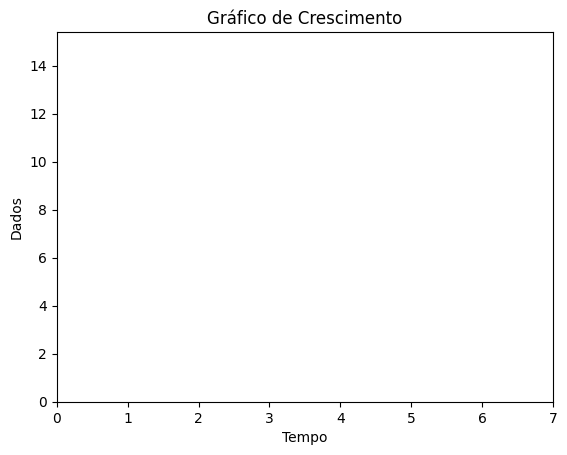

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Lista com os valores dos dados ao decorrer do tempo
dados = [1, 2, 3, 4, 5, 6, 8, 14]

# Configuração inicial do gráfico
fig, ax = plt.subplots()
line, = ax.plot([], [], color='r')

# Função de inicialização
def init():
    ax.set_xlim(0, len(dados) - 1)
    ax.set_ylim(0, max(dados) * 1.1)
    return line,

# Função de animação
def animate(i):
    x = np.arange(i + 1)
    y = dados[:i + 1]
    line.set_data(x, y)
    return line,

# Criando a animação
ani = FuncAnimation(fig, animate, frames=len(dados), init_func=init, blit=True)

# Mostrando o gráfico
plt.xlabel('Tempo')
plt.ylabel('Dados')
plt.title('Gráfico de Crescimento')
plt.show()
